In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import plotly.express as px
from os import listdir


In [2]:
DATA_DIR = "../data/Indoor/Participant_1/"

In [3]:
data = []
for file in listdir(DATA_DIR):
    if "AFE" in file:
        with open(DATA_DIR + file, "r") as f:
            data += json.loads(f.readlines()[0])
# with open(DATA_DIR + "AFE_001_CONFIDENTIAL.json", "r") as f:
#     data += json.loads(f.readlines()[0])
# with open(DATA_DIR + "AFE_002_CONFIDENTIAL.json", "r") as f:
#     data += json.loads(f.readlines()[0])
# with open(DATA_DIR + "AFE_003_CONFIDENTIAL.json", "r") as f:
#     data += json.loads(f.readlines()[0])

In [4]:
df_rows = ["l0", "l1", "l2", "l3", "l4", "l5", "r0", "r1", "r2", "r3", "r4", "r5", "epoch", "tick"]
left_temp = []
right_temp = []
epoch_temp = []
tick_temp = []

In [5]:
for data_row in data:
    if data_row["afe"][0]["t"] == "L":
        #print(data_row["afe"][0]["m"][0][:6])
        left_temp.append(data_row["afe"][0]["m"][0][:6])
        right_temp.append(data_row["afe"][1]["m"][0][:6])
        # assert data_row["afe"][0]["i"][1] 
        tick_temp.append(data_row["afe"][0]["i"][0])
        epoch_temp.append(data_row["afe"][0]["i"][1])
    else:
        right_temp.append(data_row["afe"][0]["m"][0][:6])
        left_temp.append(data_row["afe"][1]["m"][0][:6])
        tick_temp.append(data_row["afe"][0]["i"][0])
        epoch_temp.append(data_row["afe"][0]["i"][1])
        #print(left_temp)
# left_temp = left_temp[3:]
# right_temp = right_temp[3:]
len(right_temp)

57649

In [6]:
print(len(left_temp))
print(len(right_temp))
print(len(tick_temp))
print(len(epoch_temp))

57649
57649
57649
57649


In [7]:
data_row = data[0]
data_row[
"afe"
]

[{'t': 'L',
  'i': [3715918, 1699001623169289, 0, 29814],
  'm': [[19167, 6302, 9952, 15459, 16930, 17074, 22076, 17934], []]},
 {'t': 'R',
  'i': [3715918, 1699001623173379, 0, 29814],
  'm': [[24163, 5937, 7971, 13174, 16095, 8565, 7657, 5742], []]},
 {},
 {}]

In [8]:
combined = [(left + right + [epoch] + [tick]) for left, right, epoch, tick in zip(left_temp, right_temp, epoch_temp, tick_temp)]

df = pd.DataFrame(combined, columns=df_rows)
df["time"] = pd.date_range(start='1/1/2018', periods=len(df), freq='S')

# TODO OLULINE
# eemaldame epochid et visualiseerimine oleks lihtsam
df = df.drop(columns=["epoch", "tick"])

In [ ]:
# Melting the DataFrame for easier plotting with Plotly
df_melted = df.melt(id_vars='time', var_name='Variable', value_name='Value')

# Creating the plot
fig = px.line(df_melted, x='time', y='Value', color='Variable', 
              title='Interactive Plot of Multiple Series Over Time')

# Show the plot
fig.show()

In [10]:
import seaborn as sns

In [11]:
df.head()

,l0,l1,l2,l3,l4,l5,r0,r1,r2,r3,r4,r5,time
0,19167,6302,9952,15459,16930,17074,24163,5937,7971,13174,16095,8565,2018-01-01 00:00:00
1,18921,6379,10077,15337,16100,16915,24556,6056,8121,13050,14768,8457,2018-01-01 00:00:01
2,20336,6490,10175,15164,16403,16756,25708,6128,8253,13115,13648,8904,2018-01-01 00:00:02
3,19470,6470,10321,15038,16668,16637,25959,6213,8379,13155,14196,8997,2018-01-01 00:00:03
4,18126,6451,10424,15035,17033,16492,26647,6254,8458,13192,15371,8718,2018-01-01 00:00:04


In [ ]:
# Calculating the correlation matrix
corr_matrix = df.drop('time', axis=1).corr()  # Excluding the time column for correlation

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Drawing the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Adding title and adjusting layout
plt.title('Heatmap of Correlations')
plt.tight_layout()

# Display the heatmap
plt.show()

# FFT of blinks

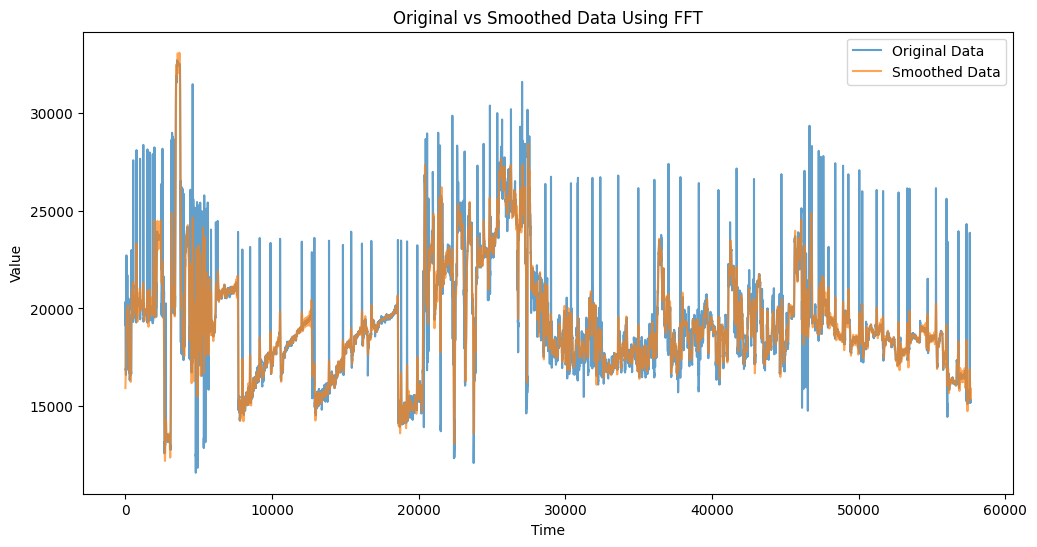

In [16]:
data_column = df['l0'].values

# Perform FFT
fft_data = np.fft.fft(data_column)

# Determine the cutoff frequency for filtering (e.g., keeping only the lower 10% of frequencies)
cutoff_index = int(len(fft_data) * 0.01)

# Create a filtered version of the FFT data
filtered_fft_data = np.copy(fft_data)
filtered_fft_data[cutoff_index:-cutoff_index] = 0

# Perform the inverse FFT to convert back to the time domain
smoothed_data = np.fft.ifft(filtered_fft_data)

# Plotting the original and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(data_column, label='Original Data', alpha=0.7)
plt.plot(smoothed_data.real, label='Smoothed Data', alpha=0.7)  # Use .real to get the real part of the complex numbers
plt.title('Original vs Smoothed Data Using FFT')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

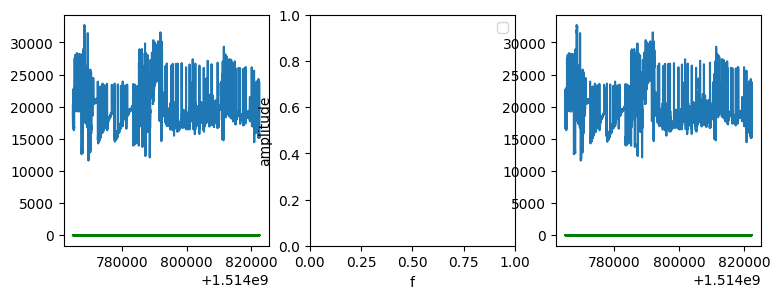

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import rfft, irfft, fftfreq, fft

# Number of samplepoints
N = 500
# sample spacing
T = 0.1

y = df["time"].astype("int64").values/10**9# df['time'].values
y = df['l0'].values

yf = fft(y)
xf = df["time"].astype("int64").values/10**9 #df['time'].values #np.linspace(0.0, 1.0/(2.0*T), N//2)
#fft end

f_signal = rfft(y)
W = fftfreq(y.size, d=y[1]-y[0])

cut_f_signal = f_signal.copy()
cut_f_signal[(W>0.6)] = 0  # filter all frequencies above 0.6

cut_signal = irfft(cut_f_signal)

# plot results
f, axarr = plt.subplots(1, 3, figsize=(9, 3))
axarr[0].plot(y, y)
axarr[0].plot(y,5*np.sin(y),'g')

#axarr[1].plot(xf, 2.0/N * np.abs(yf[:N//2]))
axarr[1].legend(('numpy fft * dt'), loc='upper right')
axarr[1].set_xlabel("f")
axarr[1].set_ylabel("amplitude")


axarr[2].plot(y,cut_signal)
axarr[2].plot(y,5*np.sin(y),'g')

plt.show()


c:\Users\Toomas\Documents\Programmeerimine\Junction2023\junctionenv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

c:\Users\Toomas\Documents\Programmeerimine\Junction2023\junctionenv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



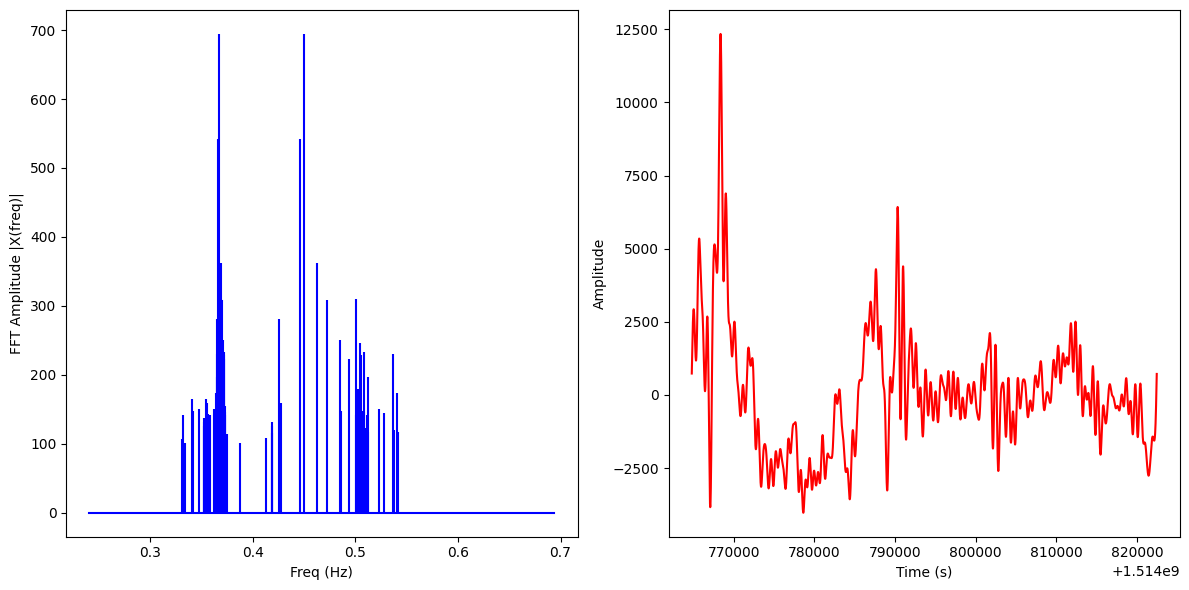

In [91]:
from scipy.fft import fft, ifft

y = df["r0"].values
t = df["time"].astype("int64").values/10**9

T = len(t)
N = len(y)

sampling_rate = N/60

freq = y/N


yfa = fft(y)
yf = np.abs(yfa) / N

yfa[np.abs(yf)<100] = 0    
yfa[np.abs(yf)>2000]  = 0

yf[np.abs(yf)<100] = 0 
yf[np.abs(yf)>2000]  = 0

plt.figure(figsize = (12, 6))
axs = plt.subplot(121)

plt.stem(freq, np.abs(yf), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 10)
# plt.ylim(0,0.2*10**8)

plt.subplot(122)
plt.plot(t, ifft(yfa), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


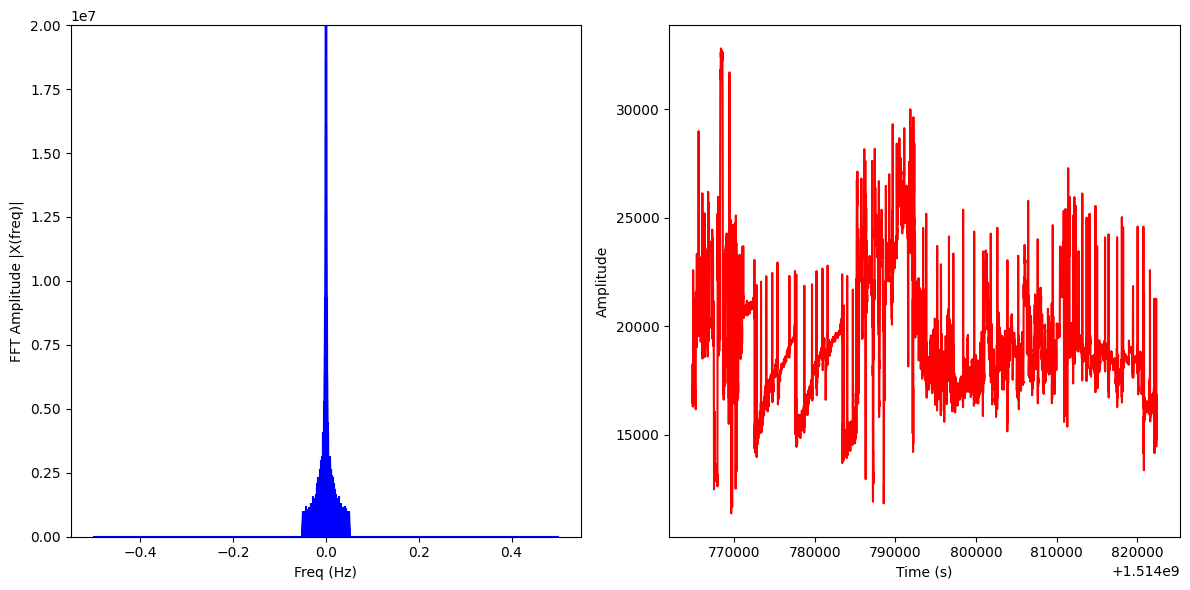

In [68]:

y = df["l0"].values
t = df["time"].astype("int64").values/10**9

T = len(t)
N = len(y)
n = np.arange(N)
T = N/60

freq = n/T 

yfa = fft(y)

# Set the threshold frequency
threshold_freq = 0.05

# Get the frequency array
freq = np.fft.fftfreq(y.shape[-1])

# Zero out the high frequency components
X_cut = yfa.copy()
X_cut[np.abs(freq) > threshold_freq] = 0



plt.figure(figsize = (12, 6))
axs = plt.subplot(121)

plt.stem(freq, np.abs(X_cut), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 10)
plt.ylim(0,0.2*10**8)

plt.subplot(122)
plt.plot(t, ifft(X_cut).real, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


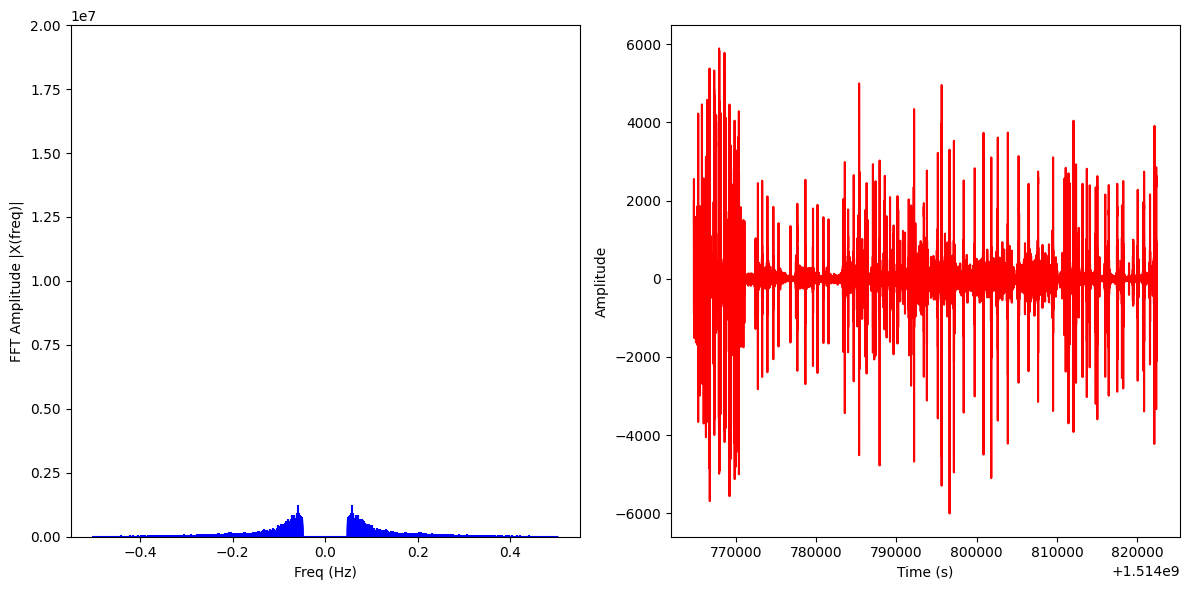

In [69]:

y = df["l0"].values
t = df["time"].astype("int64").values/10**9

T = len(t)
N = len(y)
n = np.arange(N)
T = N/60

freq = n/T 

yfa = fft(y)

# Set the threshold frequency
threshold_freq = 0.05

# Get the frequency array
freq = np.fft.fftfreq(y.shape[-1])

# Zero out the high frequency components
X_cut = yfa.copy()
X_cut[np.abs(freq) < threshold_freq] = 0



plt.figure(figsize = (12, 6))
axs = plt.subplot(121)

plt.stem(freq, np.abs(X_cut), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 10)
plt.ylim(0,0.2*10**8)

plt.subplot(122)
plt.plot(t, ifft(X_cut).real, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [26]:
# Melting the DataFrame for easier plotting with Plotly
df_melted = df.melt(id_vars='time', var_name='Variable', value_name='Value')

# Creating the plot
fig = px.line(df_melted, x='time', y='Value', color='Variable', 
              title='Interactive Plot of Multiple Series Over Time')

# Show the plot
fig.show()

0        1.514765e+09
1        1.514765e+09
2        1.514765e+09
3        1.514765e+09
4        1.514765e+09
             ...     
57644    1.514822e+09
57645    1.514822e+09
57646    1.514822e+09
57647    1.514822e+09
57648    1.514822e+09
Name: time, Length: 57649, dtype: float64